In [2]:
# Initialize modules and directories
import os
import re
import time
import tifffile
import warnings

from pathlib import Path
from datetime import datetime
from bs4 import BeautifulSoup
from collections import defaultdict
from cellfinder_core.detect import detect
from cellfinder_core.classify import classify
from cellfinder_core.tools.prep import prep_classification

# Paths to annotated test data
base_dir = '/home/elyse/Documents/GitHub/LS_evaluation_tool/test_data/images/'
output_path = '/home/elyse/Documents/GitHub/LS_evaluation_tool/test_data/cellfinder_output'

# Create output folder if first run 
if not os.path.exists(output_path):
    os.mkdir(output_path)


In [3]:
#Initialize parameters and model weights

# Detection Parameters:
start_plane = 0
end_plane = -1
voxel_sizes = [2, 1.8, 1.8]
n_free_cpus=2
soma_diameter = 9
ball_xy_size = 6
ball_z_size = 8
ball_overlap_fraction = 0.6
log_sigma_size = 0.1
n_sds_above_mean_thresh = 3
soma_spread_factor=1.4
max_cluster_size=100000

# Classification Parameters:
home = Path.home()
install_path = home / ".cellfinder" #default

trained_model = None
model_weights = None
model = "resnet50_tv"
network_depth = "50"
batch_size=32
cube_width=50
cube_height=50
cube_depth=20

# Initialize model weights
model_weights = prep_classification(trained_model, model_weights, install_path, model, n_free_cpus)

In [4]:
# Get annotated data and image file paths

# function to turn .xml files into x, y, z coordinates
def get_locations(path):
    # read xml file
    with open(path, 'r') as f:
        data = f.read()
    # get xml data in iterable format
    markers = BeautifulSoup(data, features='xml').find_all('Marker')
    cell_loci = []
    # iterate and output marker locations
    for marker in markers:
        coords = re.findall('[0-9]+', marker.text)
        coords = [int(x) for x in coords]
        cell_loci.append(coords)
    
    return cell_loci
        
blocks = defaultdict(dict)

# loop through base directory and collect all data from "block_#" subfolders
for root, dirs, files in os.walk(base_dir):
    if 'block' in root: 
        for file in files:
            try:
                block_num = re.findall('[0-9]', file)[0]
            except:
                continue  
            if 'signal' in file:
                blocks[block_num]['signal'] = os.path.join(root, file)
            elif 'background' in file:
                blocks[block_num]['background'] = os.path.join(root, file)
            elif 'detect' in file:
                blocks[block_num]['detect'] = get_locations(os.path.join(root, file))
            else:
                blocks[block_num]['reject'] = get_locations(os.path.join(root, file))

# print info on blocks        
for key in blocks.keys():
    print('Pulled annotation data for block {0}.'.format(str(key)))

Pulled annotation data for block 4.
Pulled annotation data for block 1.
Pulled annotation data for block 3.
Pulled annotation data for block 2.


In [5]:
# Run cellfinder detection for each block
# ignores divide by zero warning due to padded z-plane
warnings.simplefilter(action = 'ignore', category = RuntimeWarning)

start_detect = time.time()

for key in blocks.keys():
    
    signal_array = tifffile.imread(blocks[key]['signal'])
    cell_candidates = detect.main(signal_array, start_plane, end_plane, voxel_sizes, soma_diameter, max_cluster_size,
                                  ball_xy_size, ball_z_size, ball_overlap_fraction, soma_spread_factor, n_free_cpus,
                                  log_sigma_size, n_sds_above_mean_thresh)
    blocks[key]['candidates'] = cell_candidates

print('\n')
for key in blocks.keys():
    candidates = blocks[key]['candidates']
    print('Detected {0} candidate cells for annocation block {1}.'.format(len(candidates), str(key)))

detection_time = time.time() - start_detect

Processing planes:   9%|▊         | 13/150 [00:00<00:01, 129.84it/s]

Plane 0 received for 3D filtering
Plane 1 received for 3D filtering
Plane 2 received for 3D filtering
Plane 3 received for 3D filtering
Plane 4 received for 3D filtering
Plane 5 received for 3D filtering
Plane 6 received for 3D filtering
Plane 7 received for 3D filtering
Plane 8 received for 3D filtering
Plane 9 received for 3D filtering
Plane 10 received for 3D filtering
Plane 11 received for 3D filtering
Plane 12 received for 3D filtering
Plane 13 received for 3D filtering
Plane 14 received for 3D filtering
Plane 15 received for 3D filtering
Plane 16 received for 3D filtering
Plane 17 received for 3D filtering
Plane 18 received for 3D filtering
Plane 19 received for 3D filtering
Plane 20 received for 3D filtering
Plane 21 received for 3D filtering
Plane 22 received for 3D filtering


Processing planes:  25%|██▌       | 38/150 [00:00<00:01, 101.76it/s]

Plane 23 received for 3D filtering
Plane 24 received for 3D filtering
Plane 25 received for 3D filtering
Plane 26 received for 3D filtering
Plane 27 received for 3D filtering
Plane 28 received for 3D filtering
Plane 29 received for 3D filtering
Plane 30 received for 3D filtering
Plane 31 received for 3D filtering
Plane 32 received for 3D filtering
Plane 33 received for 3D filtering
Plane 34 received for 3D filtering
Plane 35 received for 3D filtering
Plane 36 received for 3D filtering
Plane 37 received for 3D filtering
Plane 38 received for 3D filtering
Plane 39 received for 3D filtering
Plane 40 received for 3D filtering
Plane 41 received for 3D filtering
Plane 42 received for 3D filtering
Plane 43 received for 3D filtering
Plane 44 received for 3D filtering
Plane 45 received for 3D filtering
Plane 46 received for 3D filtering
Plane 47 received for 3D filtering
Plane 48 received for 3D filtering
Plane 49 received for 3D filtering


Processing planes:  37%|███▋      | 55/150 [00:00<00:00, 119.48it/s]

Plane 50 received for 3D filtering
Plane 51 received for 3D filtering
Plane 52 received for 3D filtering
Plane 53 received for 3D filtering
Plane 54 received for 3D filtering
Plane 55 received for 3D filtering
Plane 56 received for 3D filtering
Plane 57 received for 3D filtering
Plane 58 received for 3D filtering
Plane 59 received for 3D filtering
Plane 60 received for 3D filtering
Plane 61 received for 3D filtering
Plane 62 received for 3D filtering
Plane 63 received for 3D filtering


Processing planes:  45%|████▌     | 68/150 [00:00<00:00, 92.31it/s] 

Plane 64 received for 3D filtering
Plane 65 received for 3D filtering
Plane 66 received for 3D filtering
Plane 67 received for 3D filtering
Plane 68 received for 3D filtering
Plane 69 received for 3D filtering
Plane 70 received for 3D filtering
Plane 71 received for 3D filtering
Plane 72 received for 3D filtering
Plane 73 received for 3D filtering
Plane 74 received for 3D filtering
Plane 75 received for 3D filtering
Plane 76 received for 3D filtering


Processing planes:  59%|█████▊    | 88/150 [00:00<00:00, 76.18it/s]

Plane 77 received for 3D filtering
Plane 78 received for 3D filtering
Plane 79 received for 3D filtering
Plane 80 received for 3D filtering
Plane 81 received for 3D filtering
Plane 82 received for 3D filtering
Plane 83 received for 3D filtering
Plane 84 received for 3D filtering
Plane 85 received for 3D filtering
Plane 86 received for 3D filtering
Plane 87 received for 3D filtering
Plane 88 received for 3D filtering
Plane 89 received for 3D filtering


Processing planes:  65%|██████▍   | 97/150 [00:01<00:00, 71.79it/s]

Plane 90 received for 3D filtering
Plane 91 received for 3D filtering
Plane 92 received for 3D filtering
Plane 93 received for 3D filtering
Plane 94 received for 3D filtering
Plane 95 received for 3D filtering
Plane 96 received for 3D filtering
Plane 97 received for 3D filtering
Plane 98 received for 3D filtering
Plane 99 received for 3D filtering
Plane 100 received for 3D filtering
Plane 101 received for 3D filtering
Plane 102 received for 3D filtering
Plane 103 received for 3D filtering
Plane 104 received for 3D filtering
Plane 105 received for 3D filtering
Plane 106 received for 3D filtering
Plane 107 received for 3D filtering
Plane 108 received for 3D filtering


Processing planes: 100%|██████████| 150/150 [00:01<00:00, 106.62it/s]

Plane 109 received for 3D filtering
Plane 110 received for 3D filtering
Plane 111 received for 3D filtering
Plane 112 received for 3D filtering
Plane 113 received for 3D filtering
Plane 114 received for 3D filtering
Plane 115 received for 3D filtering
Plane 116 received for 3D filtering
Plane 117 received for 3D filtering
Plane 118 received for 3D filtering
Plane 119 received for 3D filtering
Plane 120 received for 3D filtering
Plane 121 received for 3D filtering
Plane 122 received for 3D filtering
Plane 123 received for 3D filtering
Plane 124 received for 3D filtering
Plane 125 received for 3D filtering
Plane 126 received for 3D filtering
Plane 127 received for 3D filtering
Plane 128 received for 3D filtering
Plane 129 received for 3D filtering
Plane 130 received for 3D filtering
Plane 131 received for 3D filtering
Plane 132 received for 3D filtering
Plane 133 received for 3D filtering
Plane 134 received for 3D filtering
Plane 135 received for 3D filtering
Plane 136 received for 3D fi

Detection complete - all planes done in : 0:00:02.014631


Processing planes:  11%|█         | 28/260 [00:00<00:00, 254.85it/s]

Plane 0 received for 3D filtering
Plane 1 received for 3D filtering
Plane 2 received for 3D filtering
Plane 3 received for 3D filtering
Plane 4 received for 3D filtering
Plane 5 received for 3D filtering
Plane 6 received for 3D filtering
Plane 7 received for 3D filtering
Plane 8 received for 3D filtering
Plane 9 received for 3D filtering
Plane 10 received for 3D filtering
Plane 11 received for 3D filtering
Plane 12 received for 3D filtering
Plane 13 received for 3D filtering
Plane 14 received for 3D filtering
Plane 15 received for 3D filtering
Plane 16 received for 3D filtering
Plane 17 received for 3D filtering
Plane 18 received for 3D filtering
Plane 19 received for 3D filtering
Plane 20 received for 3D filtering
Plane 21 received for 3D filtering
Plane 22 received for 3D filtering
Plane 23 received for 3D filtering
Plane 24 received for 3D filtering
Plane 25 received for 3D filtering
Plane 26 received for 3D filtering
Plane 27 received for 3D filtering
Plane 28 received for 3D filte

Processing planes:  29%|██▉       | 75/260 [00:00<00:01, 178.34it/s]

Plane 45 received for 3D filtering
Plane 46 received for 3D filtering
Plane 47 received for 3D filtering
Plane 48 received for 3D filtering
Plane 49 received for 3D filtering
Plane 50 received for 3D filtering
Plane 51 received for 3D filtering
Plane 52 received for 3D filtering
Plane 53 received for 3D filtering
Plane 54 received for 3D filtering
Plane 55 received for 3D filtering
Plane 56 received for 3D filtering
Plane 57 received for 3D filtering
Plane 58 received for 3D filtering
Plane 59 received for 3D filtering
Plane 60 received for 3D filtering
Plane 61 received for 3D filtering
Plane 62 received for 3D filtering
Plane 63 received for 3D filtering
Plane 64 received for 3D filtering
Plane 65 received for 3D filtering
Plane 66 received for 3D filtering
Plane 67 received for 3D filtering
Plane 68 received for 3D filtering
Plane 69 received for 3D filtering
Plane 70 received for 3D filtering
Plane 71 received for 3D filtering
Plane 72 received for 3D filtering
Plane 73 received fo

Processing planes:  36%|███▌      | 94/260 [00:00<00:00, 179.43it/s]

Plane 76 received for 3D filtering
Plane 77 received for 3D filtering
Plane 78 received for 3D filtering
Plane 79 received for 3D filtering
Plane 80 received for 3D filtering
Plane 81 received for 3D filtering
Plane 82 received for 3D filtering
Plane 83 received for 3D filtering
Plane 84 received for 3D filtering
Plane 85 received for 3D filtering
Plane 86 received for 3D filtering
Plane 87 received for 3D filtering
Plane 88 received for 3D filtering
Plane 89 received for 3D filtering
Plane 90 received for 3D filtering
Plane 91 received for 3D filtering
Plane 92 received for 3D filtering
Plane 93 received for 3D filtering
Plane 94 received for 3D filtering
Plane 95 received for 3D filtering
Plane 96 received for 3D filtering
Plane 97 received for 3D filtering
Plane 98 received for 3D filtering
Plane 99 received for 3D filtering
Plane 100 received for 3D filtering
Plane 101 received for 3D filtering
Plane 102 received for 3D filtering
Plane 103 received for 3D filtering
Plane 104 receiv

Processing planes:  50%|█████     | 131/260 [00:00<00:00, 175.49it/s]

Plane 112 received for 3D filtering
Plane 113 received for 3D filtering
Plane 114 received for 3D filtering
Plane 115 received for 3D filtering
Plane 116 received for 3D filtering
Plane 117 received for 3D filtering
Plane 118 received for 3D filtering
Plane 119 received for 3D filtering
Plane 120 received for 3D filtering
Plane 121 received for 3D filtering
Plane 122 received for 3D filtering
Plane 123 received for 3D filtering
Plane 124 received for 3D filtering
Plane 125 received for 3D filtering
Plane 126 received for 3D filtering
Plane 127 received for 3D filtering
Plane 128 received for 3D filtering
Plane 129 received for 3D filtering
Plane 130 received for 3D filtering
Plane 131 received for 3D filtering
Plane 132 received for 3D filtering
Plane 133 received for 3D filtering
Plane 134 received for 3D filtering
Plane 135 received for 3D filtering
Plane 136 received for 3D filtering
Plane 137 received for 3D filtering
Plane 138 received for 3D filtering
Plane 139 received for 3D fi

Processing planes:  64%|██████▍   | 167/260 [00:00<00:00, 160.23it/s]

Plane 146 received for 3D filtering
Plane 147 received for 3D filtering
Plane 148 received for 3D filtering
Plane 149 received for 3D filtering
Plane 150 received for 3D filtering
Plane 151 received for 3D filtering
Plane 152 received for 3D filtering
Plane 153 received for 3D filtering
Plane 154 received for 3D filtering
Plane 155 received for 3D filtering
Plane 156 received for 3D filtering
Plane 157 received for 3D filtering
Plane 158 received for 3D filtering
Plane 159 received for 3D filtering
Plane 160 received for 3D filtering
Plane 161 received for 3D filtering
Plane 162 received for 3D filtering
Plane 163 received for 3D filtering
Plane 164 received for 3D filtering
Plane 165 received for 3D filtering
Plane 166 received for 3D filtering
Plane 167 received for 3D filtering
Plane 168 received for 3D filtering
Plane 169 received for 3D filtering
Plane 170 received for 3D filtering
Plane 171 received for 3D filtering
Plane 172 received for 3D filtering
Plane 173 received for 3D fi

Processing planes:  77%|███████▋  | 200/260 [00:01<00:00, 150.51it/s]

Plane 175 received for 3D filtering
Plane 176 received for 3D filtering
Plane 177 received for 3D filtering
Plane 178 received for 3D filtering
Plane 179 received for 3D filtering
Plane 180 received for 3D filtering
Plane 181 received for 3D filtering
Plane 182 received for 3D filtering
Plane 183 received for 3D filtering
Plane 184 received for 3D filtering
Plane 185 received for 3D filtering
Plane 186 received for 3D filtering
Plane 187 received for 3D filtering
Plane 188 received for 3D filtering
Plane 189 received for 3D filtering
Plane 190 received for 3D filtering
Plane 191 received for 3D filtering
Plane 192 received for 3D filtering
Plane 193 received for 3D filtering
Plane 194 received for 3D filtering
Plane 195 received for 3D filtering
Plane 196 received for 3D filtering
Plane 197 received for 3D filtering
Plane 198 received for 3D filtering
Plane 199 received for 3D filtering
Plane 200 received for 3D filtering
Plane 201 received for 3D filtering
Plane 202 received for 3D fi

Processing planes: 100%|██████████| 260/260 [00:01<00:00, 189.16it/s]


Plane 204 received for 3D filtering
Plane 205 received for 3D filtering
Plane 206 received for 3D filtering
Plane 207 received for 3D filtering
Plane 208 received for 3D filtering
Plane 209 received for 3D filtering
Plane 210 received for 3D filtering
Plane 211 received for 3D filtering
Plane 212 received for 3D filtering
Plane 213 received for 3D filtering
Plane 214 received for 3D filtering
Plane 215 received for 3D filtering
Plane 216 received for 3D filtering
Plane 217 received for 3D filtering
Plane 218 received for 3D filtering
Plane 219 received for 3D filtering
Plane 220 received for 3D filtering
Plane 221 received for 3D filtering
Plane 222 received for 3D filtering
Plane 223 received for 3D filtering
Plane 224 received for 3D filtering
Plane 225 received for 3D filtering
Plane 226 received for 3D filtering
Plane 227 received for 3D filtering
Plane 228 received for 3D filtering
Plane 229 received for 3D filtering
Plane 230 received for 3D filtering
Plane 231 received for 3D fi

Processing planes:   8%|▊         | 12/150 [00:00<00:01, 109.82it/s]

Plane 0 received for 3D filtering
Plane 1 received for 3D filtering
Plane 2 received for 3D filtering
Plane 3 received for 3D filtering
Plane 4 received for 3D filtering
Plane 5 received for 3D filtering
Plane 6 received for 3D filtering
Plane 7 received for 3D filtering
Plane 8 received for 3D filtering
Plane 9 received for 3D filtering
Plane 10 received for 3D filtering
Plane 11 received for 3D filtering
Plane 12 received for 3D filtering
Plane 13 received for 3D filtering
Plane 14 received for 3D filtering
Plane 15 received for 3D filtering
Plane 16 received for 3D filtering
Plane 17 received for 3D filtering


Processing planes:  21%|██▏       | 32/150 [00:00<00:01, 79.67it/s] 

Plane 18 received for 3D filtering
Plane 19 received for 3D filtering
Plane 20 received for 3D filtering
Plane 21 received for 3D filtering
Plane 22 received for 3D filtering
Plane 23 received for 3D filtering
Plane 24 received for 3D filtering
Plane 25 received for 3D filtering
Plane 26 received for 3D filtering
Plane 27 received for 3D filtering
Plane 28 received for 3D filtering
Plane 29 received for 3D filtering
Plane 30 received for 3D filtering
Plane 31 received for 3D filtering
Plane 32 received for 3D filtering
Plane 33 received for 3D filtering


Processing planes:  35%|███▍      | 52/150 [00:00<00:00, 115.26it/s]

Plane 34 received for 3D filtering
Plane 35 received for 3D filtering
Plane 36 received for 3D filtering
Plane 37 received for 3D filtering
Plane 38 received for 3D filtering
Plane 39 received for 3D filtering
Plane 40 received for 3D filtering
Plane 41 received for 3D filtering
Plane 42 received for 3D filtering
Plane 43 received for 3D filtering
Plane 44 received for 3D filtering
Plane 45 received for 3D filtering
Plane 46 received for 3D filtering
Plane 47 received for 3D filtering
Plane 48 received for 3D filtering
Plane 49 received for 3D filtering
Plane 50 received for 3D filtering
Plane 51 received for 3D filtering
Plane 52 received for 3D filtering
Plane 53 received for 3D filtering
Plane 54 received for 3D filtering
Plane 55 received for 3D filtering
Plane 56 received for 3D filtering
Plane 57 received for 3D filtering
Plane 58 received for 3D filtering


Processing planes:  43%|████▎     | 65/150 [00:00<00:00, 89.89it/s] 

Plane 59 received for 3D filtering
Plane 60 received for 3D filtering
Plane 61 received for 3D filtering
Plane 62 received for 3D filtering
Plane 63 received for 3D filtering
Plane 64 received for 3D filtering
Plane 65 received for 3D filtering
Plane 66 received for 3D filtering
Plane 67 received for 3D filtering
Plane 68 received for 3D filtering
Plane 69 received for 3D filtering
Plane 70 received for 3D filtering
Plane 71 received for 3D filtering
Plane 72 received for 3D filtering


Processing planes:  56%|█████▌    | 84/150 [00:01<00:00, 76.34it/s]

Plane 73 received for 3D filtering
Plane 74 received for 3D filtering
Plane 75 received for 3D filtering
Plane 76 received for 3D filtering
Plane 77 received for 3D filtering
Plane 78 received for 3D filtering
Plane 79 received for 3D filtering
Plane 80 received for 3D filtering
Plane 81 received for 3D filtering
Plane 82 received for 3D filtering
Plane 83 received for 3D filtering
Plane 84 received for 3D filtering
Plane 85 received for 3D filtering


Processing planes:  62%|██████▏   | 93/150 [00:01<00:00, 71.68it/s]

Plane 86 received for 3D filtering
Plane 87 received for 3D filtering
Plane 88 received for 3D filtering
Plane 89 received for 3D filtering
Plane 90 received for 3D filtering
Plane 91 received for 3D filtering
Plane 92 received for 3D filtering
Plane 93 received for 3D filtering
Plane 94 received for 3D filtering
Plane 95 received for 3D filtering
Plane 96 received for 3D filtering
Plane 97 received for 3D filtering
Plane 98 received for 3D filtering


Processing planes:  79%|███████▉  | 119/150 [00:01<00:00, 94.06it/s]

Plane 99 received for 3D filtering
Plane 100 received for 3D filtering
Plane 101 received for 3D filtering
Plane 102 received for 3D filtering
Plane 103 received for 3D filtering
Plane 104 received for 3D filtering
Plane 105 received for 3D filtering
Plane 106 received for 3D filtering
Plane 107 received for 3D filtering
Plane 108 received for 3D filtering
Plane 109 received for 3D filtering
Plane 110 received for 3D filtering
Plane 111 received for 3D filtering
Plane 112 received for 3D filtering
Plane 113 received for 3D filtering
Plane 114 received for 3D filtering
Plane 115 received for 3D filtering
Plane 116 received for 3D filtering
Plane 117 received for 3D filtering
Plane 118 received for 3D filtering
Plane 119 received for 3D filtering
Plane 120 received for 3D filtering
Plane 121 received for 3D filtering
Plane 122 received for 3D filtering
Plane 123 received for 3D filtering
Plane 124 received for 3D filtering
Plane 125 received for 3D filtering
Plane 126 received for 3D fil

Processing planes: 100%|██████████| 150/150 [00:01<00:00, 98.48it/s] 


Plane 134 received for 3D filtering
Plane 135 received for 3D filtering
Plane 136 received for 3D filtering
Plane 137 received for 3D filtering
Plane 138 received for 3D filtering
Plane 139 received for 3D filtering
Plane 140 received for 3D filtering
Plane 141 received for 3D filtering
Plane 142 received for 3D filtering
Plane 143 received for 3D filtering
Plane 144 received for 3D filtering
Plane 145 received for 3D filtering
Plane 146 received for 3D filtering
Plane 147 received for 3D filtering
Plane 148 received for 3D filtering
Plane 149 received for 3D filtering
Detection complete - all planes done in : 0:00:02.226639


Processing planes:   8%|▊         | 21/260 [00:00<00:01, 192.68it/s]

Plane 0 received for 3D filtering
Plane 1 received for 3D filtering
Plane 2 received for 3D filtering
Plane 3 received for 3D filtering
Plane 4 received for 3D filtering
Plane 5 received for 3D filtering
Plane 6 received for 3D filtering
Plane 7 received for 3D filtering
Plane 8 received for 3D filtering
Plane 9 received for 3D filtering
Plane 10 received for 3D filtering
Plane 11 received for 3D filtering
Plane 12 received for 3D filtering
Plane 13 received for 3D filtering
Plane 14 received for 3D filtering
Plane 15 received for 3D filtering
Plane 16 received for 3D filtering
Plane 17 received for 3D filtering
Plane 18 received for 3D filtering
Plane 19 received for 3D filtering
Plane 20 received for 3D filtering
Plane 21 received for 3D filtering
Plane 22 received for 3D filtering
Plane 23 received for 3D filtering
Plane 24 received for 3D filtering
Plane 25 received for 3D filtering
Plane 26 received for 3D filtering
Plane 27 received for 3D filtering
Plane 28 received for 3D filte

Processing planes:  23%|██▎       | 61/260 [00:00<00:01, 169.03it/s]

Plane 39 received for 3D filtering
Plane 40 received for 3D filtering
Plane 41 received for 3D filtering
Plane 42 received for 3D filtering
Plane 43 received for 3D filtering
Plane 44 received for 3D filtering
Plane 45 received for 3D filtering
Plane 46 received for 3D filtering
Plane 47 received for 3D filtering
Plane 48 received for 3D filtering
Plane 49 received for 3D filtering
Plane 50 received for 3D filtering
Plane 51 received for 3D filtering
Plane 52 received for 3D filtering
Plane 53 received for 3D filtering
Plane 54 received for 3D filtering
Plane 55 received for 3D filtering
Plane 56 received for 3D filtering
Plane 57 received for 3D filtering
Plane 58 received for 3D filtering
Plane 59 received for 3D filtering
Plane 60 received for 3D filtering
Plane 61 received for 3D filtering
Plane 62 received for 3D filtering
Plane 63 received for 3D filtering
Plane 64 received for 3D filtering
Plane 65 received for 3D filtering
Plane 66 received for 3D filtering
Plane 67 received fo

Processing planes:  38%|███▊      | 99/260 [00:00<00:00, 177.84it/s]

Plane 73 received for 3D filtering
Plane 74 received for 3D filtering
Plane 75 received for 3D filtering
Plane 76 received for 3D filtering
Plane 77 received for 3D filtering
Plane 78 received for 3D filtering
Plane 79 received for 3D filtering
Plane 80 received for 3D filtering
Plane 81 received for 3D filtering
Plane 82 received for 3D filtering
Plane 83 received for 3D filtering
Plane 84 received for 3D filtering
Plane 85 received for 3D filtering
Plane 86 received for 3D filtering
Plane 87 received for 3D filtering
Plane 88 received for 3D filtering
Plane 89 received for 3D filtering
Plane 90 received for 3D filtering
Plane 91 received for 3D filtering
Plane 92 received for 3D filtering
Plane 93 received for 3D filtering
Plane 94 received for 3D filtering
Plane 95 received for 3D filtering
Plane 96 received for 3D filtering
Plane 97 received for 3D filtering
Plane 98 received for 3D filtering
Plane 99 received for 3D filtering
Plane 100 received for 3D filtering
Plane 101 received 

Processing planes:  53%|█████▎    | 137/260 [00:00<00:00, 179.16it/s]

Plane 110 received for 3D filtering
Plane 111 received for 3D filtering
Plane 112 received for 3D filtering
Plane 113 received for 3D filtering
Plane 114 received for 3D filtering
Plane 115 received for 3D filtering
Plane 116 received for 3D filtering
Plane 117 received for 3D filtering
Plane 118 received for 3D filtering
Plane 119 received for 3D filtering
Plane 120 received for 3D filtering
Plane 121 received for 3D filtering
Plane 122 received for 3D filtering
Plane 123 received for 3D filtering
Plane 124 received for 3D filtering
Plane 125 received for 3D filtering
Plane 126 received for 3D filtering
Plane 127 received for 3D filtering
Plane 128 received for 3D filtering
Plane 129 received for 3D filtering
Plane 130 received for 3D filtering
Plane 131 received for 3D filtering
Plane 132 received for 3D filtering
Plane 133 received for 3D filtering
Plane 134 received for 3D filtering
Plane 135 received for 3D filtering
Plane 136 received for 3D filtering
Plane 137 received for 3D fi

Processing planes:  67%|██████▋   | 173/260 [00:00<00:00, 175.92it/s]

Plane 147 received for 3D filtering
Plane 148 received for 3D filtering
Plane 149 received for 3D filtering
Plane 150 received for 3D filtering
Plane 151 received for 3D filtering
Plane 152 received for 3D filtering
Plane 153 received for 3D filtering
Plane 154 received for 3D filtering
Plane 155 received for 3D filtering
Plane 156 received for 3D filtering
Plane 157 received for 3D filtering
Plane 158 received for 3D filtering
Plane 159 received for 3D filtering
Plane 160 received for 3D filtering
Plane 161 received for 3D filtering
Plane 162 received for 3D filtering
Plane 163 received for 3D filtering
Plane 164 received for 3D filtering
Plane 165 received for 3D filtering
Plane 166 received for 3D filtering
Plane 167 received for 3D filtering
Plane 168 received for 3D filtering
Plane 169 received for 3D filtering
Plane 170 received for 3D filtering
Plane 171 received for 3D filtering
Plane 172 received for 3D filtering
Plane 173 received for 3D filtering
Plane 174 received for 3D fi

Processing planes:  80%|████████  | 209/260 [00:01<00:00, 169.28it/s]

Plane 182 received for 3D filtering
Plane 183 received for 3D filtering
Plane 184 received for 3D filtering
Plane 185 received for 3D filtering
Plane 186 received for 3D filtering
Plane 187 received for 3D filtering
Plane 188 received for 3D filtering
Plane 189 received for 3D filtering
Plane 190 received for 3D filtering
Plane 191 received for 3D filtering
Plane 192 received for 3D filtering
Plane 193 received for 3D filtering
Plane 194 received for 3D filtering
Plane 195 received for 3D filtering
Plane 196 received for 3D filtering
Plane 197 received for 3D filtering
Plane 198 received for 3D filtering
Plane 199 received for 3D filtering
Plane 200 received for 3D filtering
Plane 201 received for 3D filtering
Plane 202 received for 3D filtering
Plane 203 received for 3D filtering
Plane 204 received for 3D filtering
Plane 205 received for 3D filtering
Plane 206 received for 3D filtering
Plane 207 received for 3D filtering
Plane 208 received for 3D filtering
Plane 209 received for 3D fi

Processing planes: 100%|██████████| 260/260 [00:01<00:00, 199.08it/s]


Plane 223 received for 3D filtering
Plane 224 received for 3D filtering
Plane 225 received for 3D filtering
Plane 226 received for 3D filtering
Plane 227 received for 3D filtering
Plane 228 received for 3D filtering
Plane 229 received for 3D filtering
Plane 230 received for 3D filtering
Plane 231 received for 3D filtering
Plane 232 received for 3D filtering
Plane 233 received for 3D filtering
Plane 234 received for 3D filtering
Plane 235 received for 3D filtering
Plane 236 received for 3D filtering
Plane 237 received for 3D filtering
Plane 238 received for 3D filtering
Plane 239 received for 3D filtering
Plane 240 received for 3D filtering
Plane 241 received for 3D filtering
Plane 242 received for 3D filtering
Plane 243 received for 3D filtering
Plane 244 received for 3D filtering
Plane 245 received for 3D filtering
Plane 246 received for 3D filtering
Plane 247 received for 3D filtering
Plane 248 received for 3D filtering
Plane 249 received for 3D filtering
Plane 250 received for 3D fi

In [6]:
#Run cell classification
from imlib.IO.cells import save_cells
start_classify = time.time()

#only run classification if there are cells to classify
for key in blocks.keys():
    signal_array = tifffile.imread(blocks[key]['signal'])
    background_array = tifffile.imread(blocks[key]['background'])
    cell_candidates = blocks[key]['candidates']
    
    cells, noncells = [], []
    
    if len(cell_candidates):
        classified_cells = classify.main(cell_candidates, signal_array, background_array, n_free_cpus, voxel_sizes,
                                         voxel_sizes, batch_size, cube_height, cube_width, cube_depth,
                                         trained_model, model_weights, network_depth)
        # save cells
        now = datetime.now()
        date_str = now.strftime("%Y_%m_%d_%H:%M:%S")
        save_cells(classified_cells, os.path.join(output_path, date_str + '_block_' + str(key) + '_classified_cells.xml'))

        # get counts of cells and noncells
        for c in classified_cells:
        
            if c.CELL == 2:
                cells.append([c.x, c.y, c.z])
            else:
                noncells.append([c.x, c.y, c.z])
        
        blocks[key]['pred_detect'] = cells
        blocks[key]['pred_reject'] = noncells
        
    print('Cell classification found {0} cells and {1} noncells in annotation block {2}.'.format(len(cells), len(noncells), key))

classify_time = time.time() - start_classify
print('\nTotal runtime for cellfinder: {0} seconds.'.format(detection_time + classify_time))
        

89/89 [==============================] - 27s 230ms/step
Cell classification found 1960 cells and 0 noncells in annotation block 4.
159/159 [==============================] - 23s 130ms/step
Cell classification found 1684 cells and 0 noncells in annotation block 1.
49/49 [==============================] - 7s 86ms/step
Cell classification found 365 cells and 0 noncells in annotation block 3.
157/157 [==============================] - 22s 128ms/step
Cell classification found 1560 cells and 0 noncells in annotation block 2.

Total runtime for cellfinder: 100.02284836769104 seconds.


In [7]:
# Identify prediction and annotation overlap and build dataframe for validation metrics
# Key: 1: signal that is detected and considered to be a cell
#      2: signal that is detected but found to be noise and rejected
#      3: singal that is annotated but not predicted to be signal

import numpy as np
import pandas as pd
from scipy.spatial import KDTree

# max distance a prediction can be off and still count as cell. very conservative at 1 px 
max_dist = 1
metric_df = pd.DataFrame(columns = ['x', 'y', 'z', 'block', 'annotated', 'predicted'])

for key in blocks.keys():
    
    # get annotated data (not alwats a reject file)
    annot_detect = np.asarray(blocks[key]['detect'])
            
    try:
        annot_reject = np.asarray(blocks[key]['reject'])
        type_reject = np.ones((len(annot_reject), 1)) * 2
        
        annot_points = np.concatenate((annot_detect, annot_reject), axis = 0)
        annot_types = np.concatenate((np.ones((len(annot_detect), 1)),
                                      np.ones((len(annot_reject), 1)) * 2), axis = 0)
    except:
        annot_points = annot_detect.copy()
        annot_types = np.ones((len(annot_detect), 1))

    # get predicted data
    pred_detect = np.asarray(blocks[key]['pred_detect'])
    pred_reject = np.asarray(blocks[key]['pred_reject'])
    
    if len(pred_reject) > 0:
        pred_points = np.concatenate((pred_detect, pred_reject), axis = 0)
        pred_types = np.concatenate((np.ones((len(pred_detect), 1)),
                                     np.ones((len(pred_reject), 1)) * 2), axis = 0)
    else:
        pred_points = pred_detect.copy()
        pred_types = np.ones((len(pred_detect), 1))
        
    # create annotation and prediction tree for comparison
    annot_tree = KDTree(annot_points)
    pred_tree = KDTree(pred_points)
    
    # returns: for each element in annot_tree[i], indexes[i] is a list of indecies within distance r from pred_tree
    indexes = annot_tree.query_ball_tree(pred_tree, r = 1)
    pred_id = np.zeros((len(annot_types), 1))
    pred_extra = np.zeros((len(pred_types), 1))
    
    # get the index and type for all annotated cells and id predicted cells that were not annotated
    for c, idx in enumerate(indexes):
        if len(idx) > 0:
            pred_id[c] = pred_types[idx[0]]
            pred_extra[idx[0]] = 1
    
    pred_id[pred_id == 0] = 3
    data_array = np.concatenate((annot_points,
                                 np.ones((len(annot_points), 1)) * int(key),
                                 annot_types,
                                 pred_id), axis = 1)
    
    # get location and type of predicted cells that where not annotated
    pred_extra_loc, _ = np.where(pred_extra == 0)
    if len(pred_extra_loc) > 0:
        curr_points = pred_points[pred_extra_loc[:], :]
        curr_types = pred_types[pred_extra_loc[:], :]
        pred_array = np.concatenate((curr_points,
                                    np.ones((len(curr_points), 1)) * int(key),
                                    np.ones((len(curr_points), 1)) * 3,
                                    curr_types), axis = 1)
        
        # add to annot array
        data_array = np.vstack((data_array, pred_array))

    # create dataframes                                         
    curr_df = pd.DataFrame(data_array, columns = ['x', 'y', 'z', 'block', 'annotated', 'predicted'])
    metric_df = pd.concat((metric_df, curr_df))

print(metric_df[10:])                                      

          x      y      z  block  annotated  predicted
10    145.0  132.0   51.0    4.0        1.0        1.0
11    199.0  145.0   51.0    4.0        1.0        1.0
12    160.0  150.0   51.0    4.0        1.0        1.0
13    127.0  151.0   51.0    4.0        1.0        1.0
14    184.0  154.0   51.0    4.0        1.0        1.0
...     ...    ...    ...    ...        ...        ...
1671  139.0  112.0  189.0    2.0        3.0        1.0
1672   82.0  177.0  188.0    2.0        3.0        1.0
1673   55.0  175.0  193.0    2.0        3.0        1.0
1674   51.0  120.0  195.0    2.0        3.0        1.0
1675  147.0   60.0  204.0    2.0        3.0        1.0

[6025 rows x 6 columns]


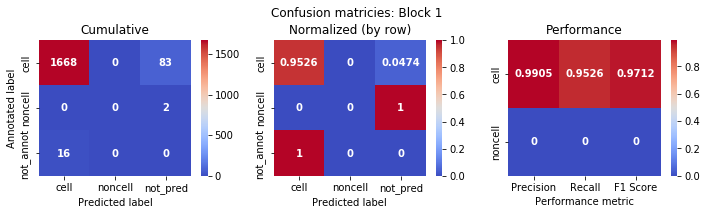

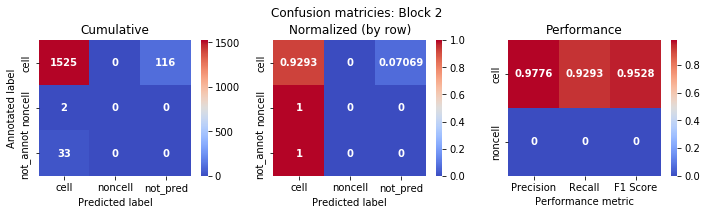

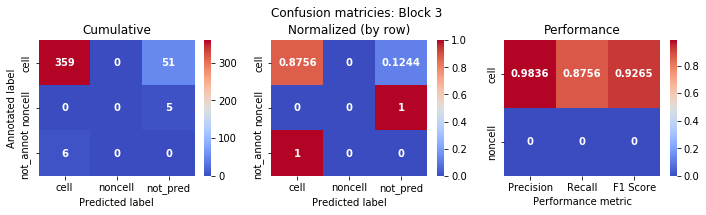

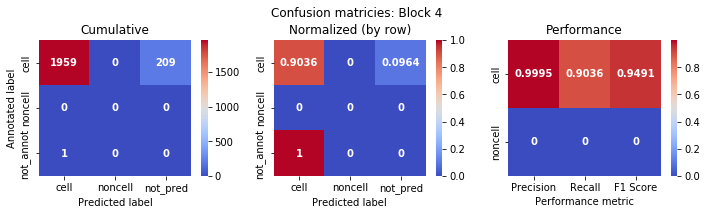

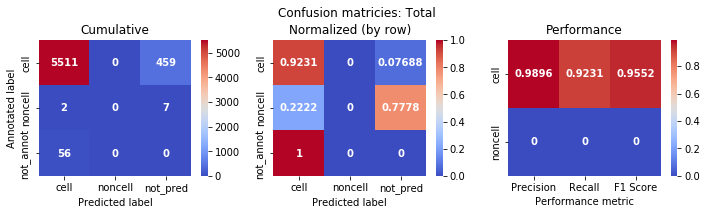

In [8]:
# Classification Metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pycm import ConfusionMatrix

# ignores numpy.where() warning
warnings.simplefilter(action = 'ignore', category = FutureWarning)

# Plot cumulative, Row normalized, and Performance for each block as well as total
for i in range(int(metric_df['block'].max()) + 1):
    fig, ax = plt.subplots(1, 3, figsize = (10, 3))
    
    if i < metric_df['block'].max():
        block_df = metric_df.loc[metric_df['block'] == i + 1, :]
        cm = ConfusionMatrix(block_df['annotated'].values, block_df['predicted'].values, classes = [1.0, 2.0, 3.0])
        fig.suptitle('Confusion matricies: Block ' + str(i + 1))
    else:
        cm = ConfusionMatrix(metric_df['annotated'].values, metric_df['predicted'].values, classes = [1.0, 2.0, 3.0])
        fig.suptitle('Confusion matricies: Total')
    
    for j in range(3):
        if j == 0:
            cm_df = pd.DataFrame(cm.to_array(normalized = False), columns = ['cell', 'noncell', 'not_pred'], index = ['cell', 'noncell', 'not_annot'])
            ax[j].set_title('Cumulative')
        elif j == 1:
            cm_df = pd.DataFrame(cm.to_array(normalized = True), columns = ['cell', 'noncell', 'not_pred'], index = ['cell', 'noncell', 'not_annot'])
            ax[j].set_title('Normalized (by row)')
        else:
            perf_array = np.asarray([[cm.class_stat['PPV'][k], cm.class_stat['TPR'][k], cm.class_stat['F1'][k]] for k in [1.0, 2.0]])
            perf_array = np.where(perf_array == 'None', 0, perf_array)
            cm_df = pd.DataFrame(perf_array.astype(float), columns = ['Precision', 'Recall', 'F1 Score'], index = ['cell', 'noncell'])
            ax[j].set_title('Performance')
            
        sns.heatmap(cm_df, annot = True, cmap = 'coolwarm', fmt = '.4g', annot_kws = {'fontweight': 'heavy'}, ax = ax[j])
        
        if j == 0:
            ax[j].set_ylabel('Annotated label')
        
        if j != 2:
            ax[j].set_xlabel('Predicted label')
        else:
            ax[j].set_xlabel('Performance metric')
            
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
